In [2]:
f(x) = x^3 - x

f (generic function with 1 method)

In [3]:
f(3)

24

In [4]:
@code_llvm debuginfo = :none f(3)

define i64 @julia_f_1030(i64 signext %0) #0 {
top:
  %1 = mul i64 %0, %0
  %2 = mul i64 %1, %0
  %3 = sub i64 %2, %0
  ret i64 %3
}


In [5]:
@code_llvm debuginfo = :none f(1.5)

define double @julia_f_1055(double %0) #0 {
top:
  %1 = fmul double %0, %0
  %2 = fmul double %1, %0
  %3 = fsub double %2, %0
  ret double %3
}


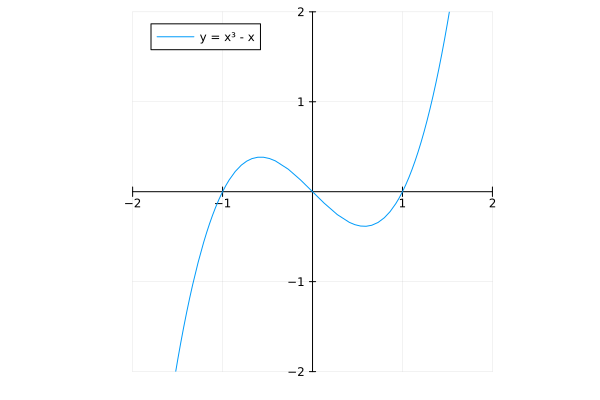

In [6]:
using Plots

plot(f, xlims=(-2, 2), ylims = (-2, 2), framestyle = :origin, aspect_ratio = 1, label = "y = x³ - x")

In [14]:
A = rand(5,5)

5×5 Matrix{Float64}:
 0.116521  0.315915  0.542434  0.13958   0.618666
 0.582263  0.781864  0.555749  0.109752  0.0328851
 0.193428  0.813955  0.517052  0.694901  0.0237618
 0.944013  0.605807  0.431827  0.285264  0.879667
 0.102067  0.509454  0.813436  0.761947  0.46692

In [15]:
f(A)

5×5 Matrix{Float64}:
 1.74421  2.42938  1.7304   1.45994  0.814574
 1.12132  2.02637  1.83779  1.47519  1.2685
 1.81038  2.54383  2.55157  1.23807  1.80422
 1.85695  4.00655  3.59426  2.68906  1.47849
 2.61068  3.71127  2.93541  1.72406  1.9138

In [16]:
b = [-2, -1, 0, 1, 2]

5-element Vector{Int64}:
 -2
 -1
  0
  1
  2

In [17]:
f(b)

LoadError: MethodError: no method matching ^(::Vector{Int64}, ::Int64)

[0mClosest candidates are:
[0m  ^([91m::Float32[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1277[24m[39m
[0m  ^([91m::Missing[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:165[24m[39m
[0m  ^([91m::Missing[39m, ::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:123[24m[39m
[0m  ...


In [18]:
map(f, b)

5-element Vector{Int64}:
 -6
  0
  0
  0
  6

In [19]:
f.(b)

5-element Vector{Int64}:
 -6
  0
  0
  0
  6

In [20]:
using LinearAlgebra

A \ b

5-element Vector{Float64}:
  7.473637671576868
 -9.92655157443898
  3.1161290380903695
  7.36389093746315
 -3.9650419597124524

In [21]:
det(A)

-0.08463334492706283

In [31]:
using SparseArrays

rows = [1,3,4,2,1,3,1,4,1,5]
cols = [1,1,1,2,3,3,4,4,5,5]
vals = [1,-2,-4,5,-3,-1,-2,1,7,-1]

A = sparse(rows, cols, vals, 5, 5)

5×5 SparseMatrixCSC{Int64, Int64} with 10 stored entries:
  1  ⋅  -3  -2   7
  ⋅  5   ⋅   ⋅   ⋅
 -2  ⋅  -1   ⋅   ⋅
 -4  ⋅   ⋅   1   ⋅
  ⋅  ⋅   ⋅   ⋅  -1

In [32]:
b = collect(1:5)

A * b

5-element Vector{Int64}:
 19
 10
 -5
  0
 -5

In [33]:
"""
Nombre rationnel
"""
struct MyRational
    n :: Int
    d :: Int

    function MyRational(n :: Int, d :: Int) 
        @assert d != "zero denominator"
        g = gcd(n,d)
        new( n ÷ g, d ÷ g)
    end
end

a = MyRational(3, 4)

MyRational(3, 4)

In [34]:
Base.show(io::IO, r::MyRational) = print(io, "$(r.n) / $(r.d)")

b = MyRational(2, 3)

2 / 3

In [35]:
import Base.+
function +(a::MyRational, b::MyRational)
    MyRational(a.n*b.d+b.n*a.d, a.d*b.d)
end

a + b

17 / 12

In [36]:
using Random

function generate_data( rng, weights, bias; num_samples = 100, noise = 0.01)

    num_features = length(weights)
    x = randn(rng, (num_features, num_samples))  # création des variables explicatives aléatoires
    y =  x' * weights .+ bias .+ noise .* randn(rng, num_samples)

    return x, y

end

rng = Xoshiro(1234)

weights = [0.1, 0.2, 0.3, 0.4, 0.5 ]
bias = 1.0

x, y =  generate_data( rng, weights, bias)

([0.9706563288552144 -1.445177115286233 … 0.6785478622508077 -0.2702750330391049; -0.9792184115351997 2.7074239417157804 … -0.2851921262946706 -0.20563037602802728; … ; -0.03280312924463938 0.759804020007466 … 0.4207068461244445 -1.2139401711703544; -0.6007922233555612 -0.8814369061964817 … -0.31934708892587327 1.0914985820684815], [0.8573671290203619, 1.7054712475117924, 2.051575125931088, 0.0709809674049187, 0.4155305509360861, 1.6969921297327404, 0.4297595204119519, -0.12530952219770528, 0.2788086540031868, 1.822435013919742  …  1.538820217823834, 1.6959881951955973, 0.7062436075061377, 0.7527966528477438, 0.3596565833677844, -0.012267018858789003, 0.19454649272747426, 1.0911042443203092, 0.855704318606509, 1.2268078852377329])

In [37]:
function linear_regression( x, y; learning_rate = 0.01, iterations = 1000)
        
    num_features, num_samples  = size(x)
    weights = ones(num_features)
    bias = 0.0
    
    for i in 1:iterations
        
        y_pred =  x' * weights .+ bias
        dw = x * ( y_pred .- y ) ./ num_samples
        db = sum(y_pred .- y ) ./ num_samples
        weights .-= learning_rate .* dw
        bias -= learning_rate * db
        
    end
    
    return weights, bias
        
end

w , b = linear_regression( x, y)

([0.09977581260137885, 0.20118354084401907, 0.297298465884907, 0.39800424573247944, 0.4977548983483193], 1.0001578602110517)

In [38]:
linear_regression( Float32.(x), Float32.(y))

([0.0997758173210195, 0.20118354041467362, 0.2972984682111354, 0.39800424419151886, 0.49775490157272706], 1.0001578622912202)

In [39]:
function linear_regression( x::Matrix{T}, y::Vector{T}; learning_rate = 0.01, iterations = 1000) where T
        
    num_features, num_samples  = size(x)
    weights = ones(T, num_features)
    bias = zero(T)
    
    for i in 1:iterations
        
        y_pred =  x' * weights .+ bias
        dw = x * ( y_pred .- y ) ./ num_samples
        db = sum(y_pred .- y ) ./ num_samples
        weights .-= T(learning_rate) .* dw
        bias -= T(learning_rate) * db
        
    end
    
    return weights, bias
        
end

linear_regression( Float32.(x), Float32.(y))

(Float32[0.09977561, 0.20118345, 0.29729843, 0.39800414, 0.49775493], 1.0001556f0)

In [40]:
struct LinearRegression{T}

   learning_rate :: T
   iterations :: Int 
   weights :: Vector{T}
   bias :: T
    
   function LinearRegression( x :: Matrix{T}, y :: Vector{T}; learning_rate = 0.01, iterations = 1000) where T
        
        num_features, num_samples  = size(x)
        weights, bias = linear_regression(x, y, learning_rate = learning_rate, iterations = iterations)
        
        new{T}( learning_rate, iterations, weights, bias)
        
    end
        
end


model = LinearRegression(x, y)

model.weights

5-element Vector{Float64}:
 0.09977581260137885
 0.20118354084401907
 0.297298465884907
 0.39800424573247944
 0.4977548983483193

In [44]:
model.bias

1.0001578602110517

In [45]:
predict(model :: LinearRegression, x) = x' * model.weights .+ model.bias

function Base.show(io :: IO, model :: LinearRegression) 
    println(io, "Linear Regression")
    println(io, "=================")
    println(io, "weights : $(round.(model.weights, digits=3))")
    println(io, "bias : $(round(model.bias, digits=3))")
end

model

Linear Regression
weights : [0.1, 0.201, 0.297, 0.398, 0.498]
bias : 1.0


In [46]:
model_f0 = LinearRegression(Float32.(x), Float32.(y))

Linear Regression
weights : Float32[0.1, 0.201, 0.297, 0.398, 0.498]
bias : 1.0


In [47]:
model_f0.bias

1.0001556f0